As social media usage becomes increasingly prevalent in every age group, a vast majority of citizens rely on this essential medium for day-to-day communication. Social media’s ubiquity means that cyberbullying can effectively impact anyone at any time or anywhere.



This dataset contains more than 47000 tweets labelled according to the class of cyberbullying:

1. Age
2. Ethnicity
3. Gender
4. Religion
5. Other type of cyberbullying
6. Not cyberbullying

In [4]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import  BeautifulSoup

import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords

from collections import Counter
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px


In [5]:
df = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Data\Dataset\cyberbullying_tweets.csv")
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


Checking the Null Values

In [6]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [8]:
df.cyberbullying_type.value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

Checking Duplicates

In [9]:
df.tweet_text.duplicated().sum()

1675

In [10]:
df.drop_duplicates('tweet_text',inplace=True)

Preprocessing the Text

In [11]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
lemma = WordNetLemmatizer()

#loop through each review, remove punctuations, small case it, join it and add it to corpus
def clean(rev):
    rev = str(rev).lower()
    rev = re.sub('[^a-zA-Z]',' ',rev)
    rev = re.sub('\[.*?\]','',rev)
    rev = re.sub('https?://\S+|www.\.\S+','',rev)
    rev = re.sub('<.*?>+','',rev)
    rev = re.sub('\n','',rev)
    rev = re.sub('\w*\d\w*','',rev)
    rev=rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev=" ".join(rev)
    return rev

df['tweet_text'] = df['tweet_text'].apply(clean)


KeyboardInterrupt: 

In [ ]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

df['tweet_text'] = df['tweet_text'].apply(preprocess)

EDA

In [ ]:
df.cyberbullying_type.value_counts()

religion               7995
age                    7992
ethnicity              7952
not_cyberbullying      7937
gender                 7898
other_cyberbullying    6243
Name: cyberbullying_type, dtype: int64

In [ ]:
from nltk.tokenize import word_tokenize

df['tweet_list'] = df['tweet_text'].apply(word_tokenize)

In [ ]:
df.head()

,tweet_text,cyberbullying_type,tweet_list
0,word katandandre food crapilicious mkr,not_cyberbullying,"[word, katandandre, food, crapilicious, mkr]"
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying,"[aussietv, white, mkr, theblock, imacelebritya..."
2,xochitlsuckkks classy whore red velvet cupcake,not_cyberbullying,"[xochitlsuckkks, classy, whore, red, velvet, c..."
3,jason gio meh p thanks head concerned another ...,not_cyberbullying,"[jason, gio, meh, p, thanks, head, concerned, ..."
4,rudhoeenglish isi account pretending kurdish a...,not_cyberbullying,"[rudhoeenglish, isi, account, pretending, kurd..."


In [ ]:
df.head()

,tweet_text,cyberbullying_type,tweet_list
0,word katandandre food crapilicious mkr,not_cyberbullying,"[word, katandandre, food, crapilicious, mkr]"
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying,"[aussietv, white, mkr, theblock, imacelebritya..."
2,xochitlsuckkks classy whore red velvet cupcake,not_cyberbullying,"[xochitlsuckkks, classy, whore, red, velvet, c..."
3,jason gio meh p thanks head concerned another ...,not_cyberbullying,"[jason, gio, meh, p, thanks, head, concerned, ..."
4,rudhoeenglish isi account pretending kurdish a...,not_cyberbullying,"[rudhoeenglish, isi, account, pretending, kurd..."


In [ ]:
not_cyberbullying_type = df[df['cyberbullying_type'] == 'not_cyberbullying']
gender_type = df[df['cyberbullying_type'] == 'gender']
religion_type = df[df['cyberbullying_type'] == 'religion']
ethnicity_type = df[df['cyberbullying_type'] == 'ethnicity']
age_type = df[df['cyberbullying_type'] == 'age']
othercyberbullying_type = df[df['cyberbullying_type'] == 'other_cyberbullying']

Word Frequency using n_grams

In [ ]:
new = " ".join(df['tweet_text'])

In [ ]:
new_words = nltk.word_tokenize(new)
stopwords= text.ENGLISH_STOP_WORDS.union(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" ,"london", "heathrow", "aircraft", "could","even", "would"])
new_wordss=[word for word in new_words if word not in stopwords]

In [ ]:
new_wordss

['word',
 'katandandre',
 'food',
 'crapilicious',
 'mkr',
 'aussietv',
 'white',
 'mkr',
 'theblock',
 'imacelebrityau',
 'today',
 'sunrise',
 'studio',
 'neighbour',
 'wonderlandten',
 'xochitlsuckkks',
 'classy',
 'whore',
 'red',
 'velvet',
 'cupcake',
 'jason',
 'gio',
 'meh',
 'p',
 'thanks',
 'head',
 'concerned',
 'angry',
 'dude',
 'twitter',
 'rudhoeenglish',
 'isi',
 'account',
 'pretending',
 'kurdish',
 'account',
 'like',
 'islam',
 'lie',
 'raja',
 'aab',
 'quickieleaks',
 'yes',
 'test',
 'god',
 'good',
 'bad',
 'indifferent',
 'weird',
 'prof',
 'god',
 'existence',
 'itu',
 'sekolah',
 'ya',
 'bukan',
 'tempat',
 'bully',
 'ga',
 'jauh',
 'kaya',
 'neraka',
 'karma',
 'hope',
 'bite',
 'kat',
 'butt',
 'nasty',
 'mkr',
 'stockputout',
 'priest',
 'rebecca',
 'black',
 'drop',
 'school',
 'bullying',
 'jord',
 'dead',
 'http',
 'usqinyw',
 'gn',
 'bully',
 'flush',
 'kd',
 'http',
 'twitvid',
 'com',
 'tnp',
 'ughhhh',
 'mkr',
 'rt',
 'kurdsnews',
 'turkish',
 'state

n_grams

<AxesSubplot: >

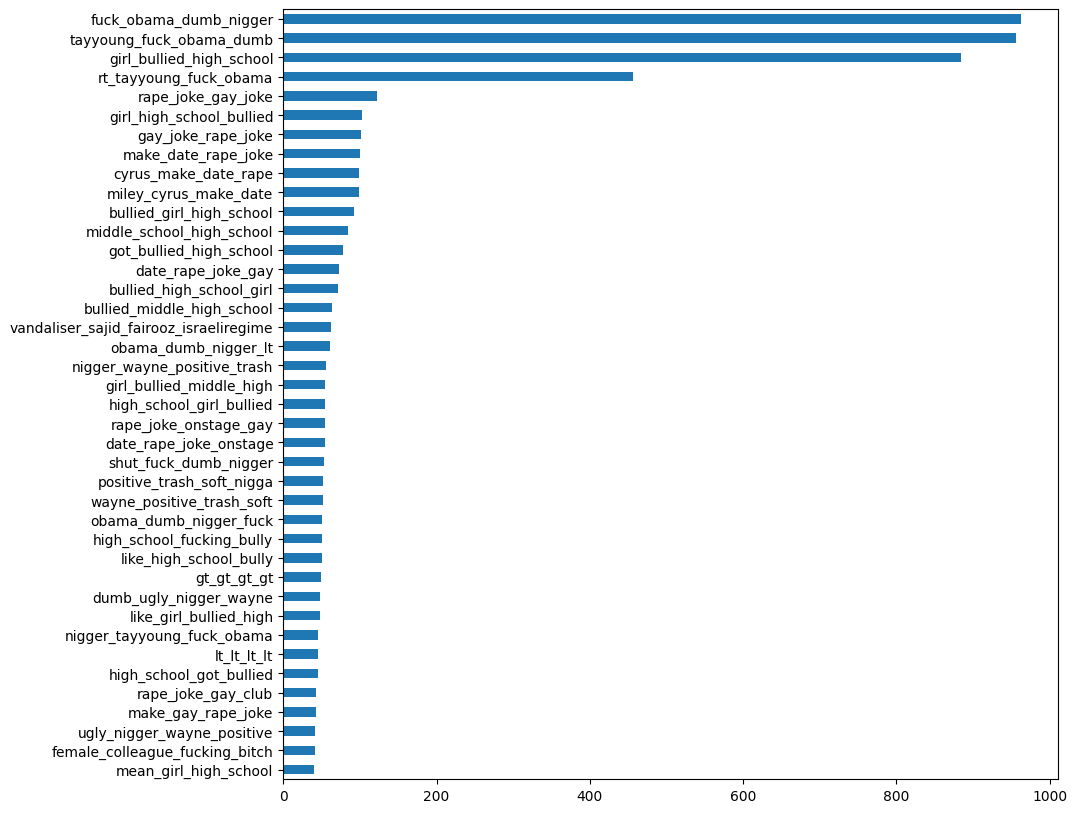

In [ ]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

def get_freq_dist(new_words,num_of_ngrams):
    from nltk import ngrams

    ngrams = ngrams(new_words,num_of_ngrams)

    ngram_fd = FreqDist(ngrams).most_common(40)

    # Sorting Data on the Basis of Number
    ngram_sorted = {k:v for k,v in sorted(ngram_fd,key=lambda item:item[1])}

    #Joining words using '_'
    ngram_joined = {"_".join(k):v for k,v in sorted(ngram_fd,key=lambda item:item[1])}

   ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    #print(ngram_freqdist)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")

    
    return ax

get_freq_dist(new_wordss,4)

Gender Based Cyberbullying

In [ ]:
gender_type.head(2)

,tweet_text,cyberbullying_type,tweet_list
7945,rape real zvasiyana nema joke drunk gay lesbia...,gender,"[rape, real, zvasiyana, nema, joke, drunk, gay..."
7946,never saw celebrity say anything like obama b ...,gender,"[never, saw, celebrity, say, anything, like, o..."


In [ ]:
gender = Counter([item for sublist in gender_type['tweet_list'] for item in sublist])
top_20 = pd.DataFrame(gender.most_common(20))
top_20.columns=['Top Words','Count']

In [ ]:
top_20

,Top Words,Count
0,joke,5425
1,rape,4359
2,gay,4254
3,rt,1241
4,woman,1216
5,bitch,1176
6,female,1134
7,call,1116
8,people,1018
9,sexist,983


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'joke'),
  Text(1, 0, 'rape'),
  Text(2, 0, 'gay'),
  Text(3, 0, 'rt'),
  Text(4, 0, 'woman'),
  Text(5, 0, 'bitch'),
  Text(6, 0, 'female'),
  Text(7, 0, 'call'),
  Text(8, 0, 'people'),
  Text(9, 0, 'sexist'),
  Text(10, 0, 'make'),
  Text(11, 0, 'like'),
  Text(12, 0, 'http'),
  Text(13, 0, 'funny'),
  Text(14, 0, 'mkr'),
  Text(15, 0, 'men'),
  Text(16, 0, 'think'),
  Text(17, 0, 'amp'),
  Text(18, 0, 'get'),
  Text(19, 0, 'one')])

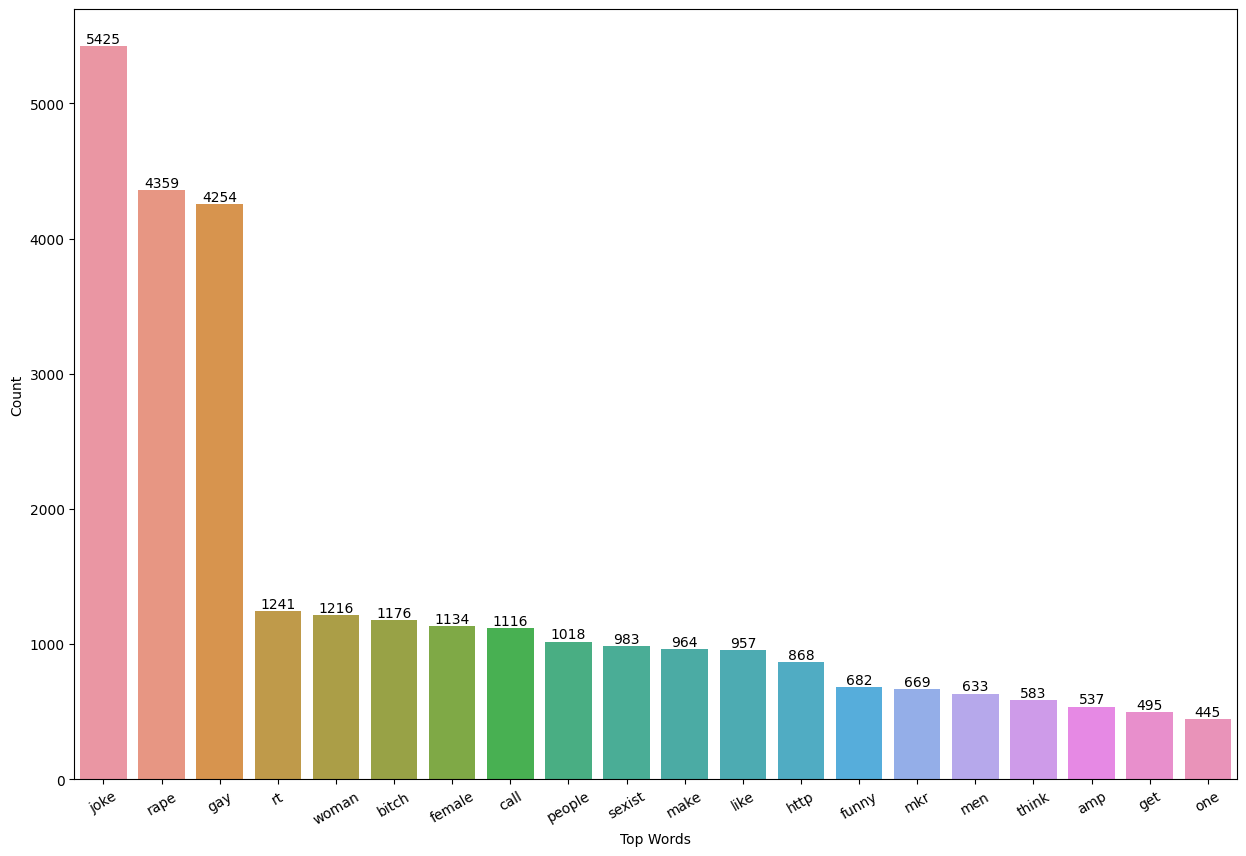

In [ ]:
## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
plt.figure(figsize=(15,10))
all_plot = sns.barplot(x=top_20['Top Words'], y=top_20['Count'])
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

Religion Based Cyberbullying

In [ ]:
religion = Counter([item for sublist in religion_type['tweet_list'] for item in sublist])
top_20 = pd.DataFrame(religion.most_common(20))
top_20.columns=['Top Words','Count']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'muslim'),
  Text(1, 0, 'idiot'),
  Text(2, 0, 'christian'),
  Text(3, 0, 'u'),
  Text(4, 0, 'terrorist'),
  Text(5, 0, 'right'),
  Text(6, 0, 'islamic'),
  Text(7, 0, 'woman'),
  Text(8, 0, 'like'),
  Text(9, 0, 'islam'),
  Text(10, 0, 'terrorism'),
  Text(11, 0, 'radical'),
  Text(12, 0, 'people'),
  Text(13, 0, 'support'),
  Text(14, 0, 'amp'),
  Text(15, 0, 'hindu'),
  Text(16, 0, 'know'),
  Text(17, 0, 'isi'),
  Text(18, 0, 'one'),
  Text(19, 0, 'jihad')])

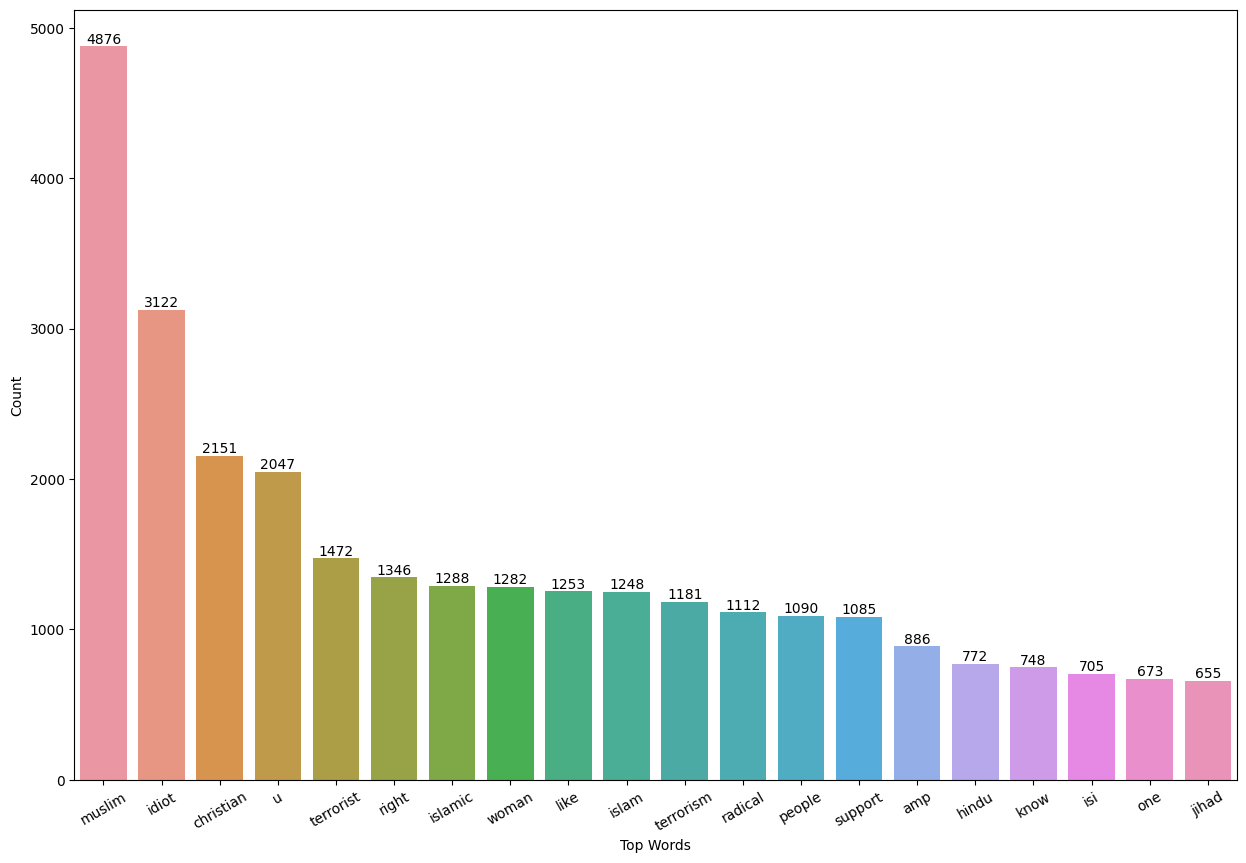

In [ ]:
## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
plt.figure(figsize=(15,10))
all_plot = sns.barplot(x=top_20['Top Words'], y=top_20['Count'])
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

Ethnicity Based Cyberbuilding

In [ ]:
ethnicity = Counter([item for sublist in ethnicity_type['tweet_list'] for item in sublist])
top_20 = pd.DataFrame(ethnicity.most_common(20))
top_20.columns=['Top Words','Count']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'nigger'),
  Text(1, 0, 'fuck'),
  Text(2, 0, 'dumb'),
  Text(3, 0, 'as'),
  Text(4, 0, 'black'),
  Text(5, 0, 'u'),
  Text(6, 0, 'white'),
  Text(7, 0, 'rt'),
  Text(8, 0, 'people'),
  Text(9, 0, 'obama'),
  Text(10, 0, 'one'),
  Text(11, 0, 'bitch'),
  Text(12, 0, 'like'),
  Text(13, 0, 'ur'),
  Text(14, 0, 'tayyoung'),
  Text(15, 0, 'called'),
  Text(16, 0, 'first'),
  Text(17, 0, 'racism'),
  Text(18, 0, 'anything'),
  Text(19, 0, 'past')])

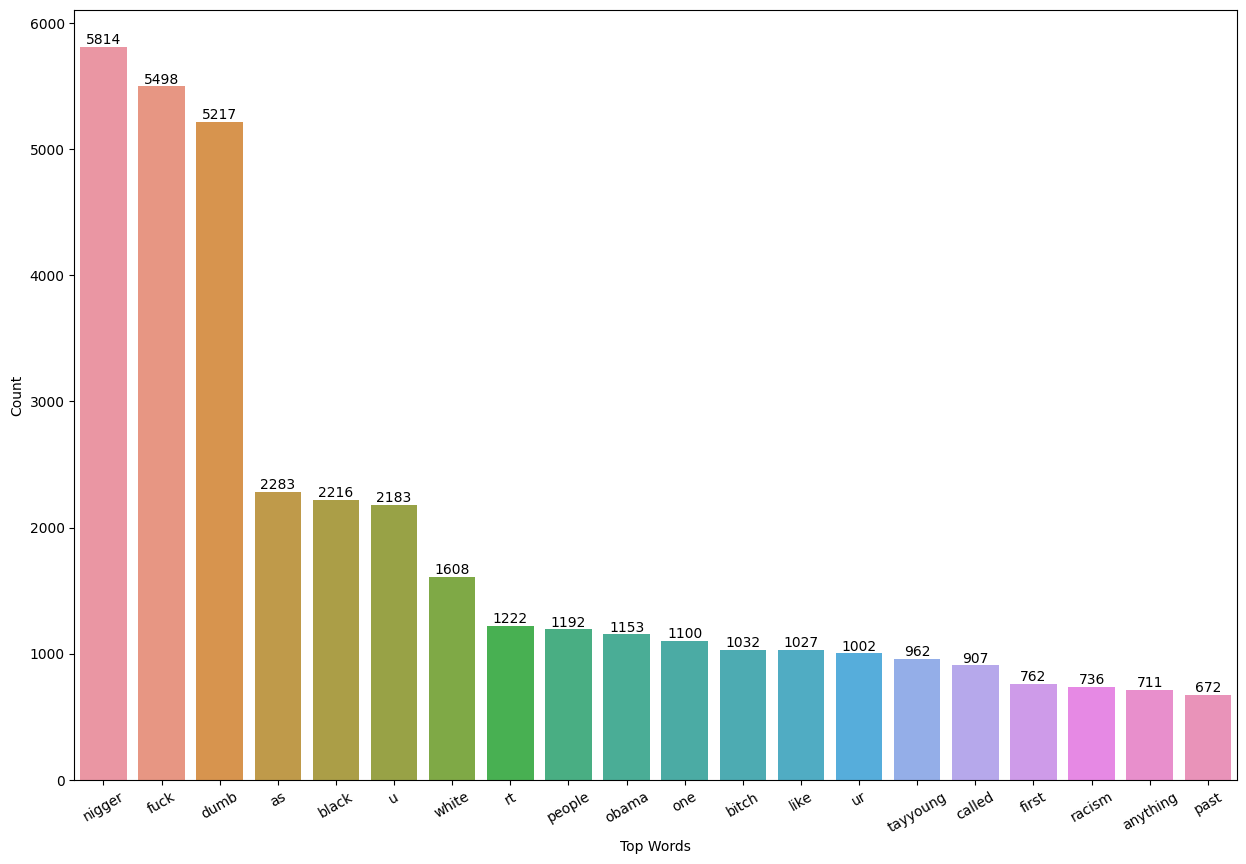

In [ ]:
## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
plt.figure(figsize=(15,10))
all_plot = sns.barplot(x=top_20['Top Words'], y=top_20['Count'])
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

Age type Cyberbuilding

In [ ]:
age = Counter([item for sublist in age_type['tweet_list'] for item in sublist])
top_20 = pd.DataFrame(age.most_common(20))
top_20.columns=['Top Words','Count']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'school'),
  Text(1, 0, 'high'),
  Text(2, 0, 'girl'),
  Text(3, 0, 'bully'),
  Text(4, 0, 'bullied'),
  Text(5, 0, 'like'),
  Text(6, 0, 'one'),
  Text(7, 0, 'people'),
  Text(8, 0, 'got'),
  Text(9, 0, 'kid'),
  Text(10, 0, 'get'),
  Text(11, 0, 'middle'),
  Text(12, 0, 'would'),
  Text(13, 0, 'friend'),
  Text(14, 0, 'year'),
  Text(15, 0, 'amp'),
  Text(16, 0, 'know'),
  Text(17, 0, 'u'),
  Text(18, 0, 'time'),
  Text(19, 0, 'back')])

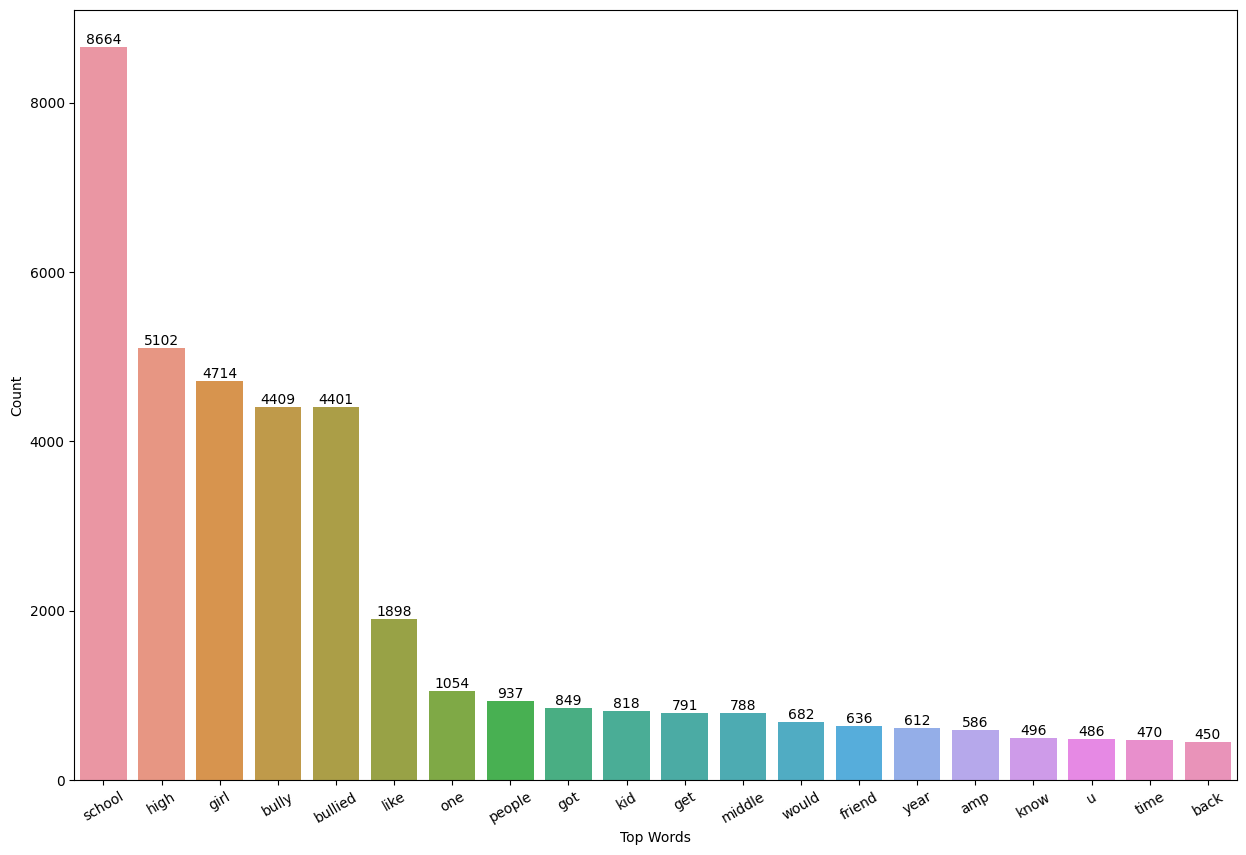

In [ ]:
## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
plt.figure(figsize=(15,10))
all_plot = sns.barplot(x=top_20['Top Words'], y=top_20['Count'])
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

OtherCyberBullying Type

In [ ]:
other = Counter([item for sublist in othercyberbullying_type['tweet_list'] for item in sublist])
top_20 = pd.DataFrame(other.most_common(20))
top_20.columns=['Top Words','Count']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'http'),
  Text(1, 0, 'co'),
  Text(2, 0, 'rt'),
  Text(3, 0, 'bully'),
  Text(4, 0, 'like'),
  Text(5, 0, 'fucking'),
  Text(6, 0, 'people'),
  Text(7, 0, 'get'),
  Text(8, 0, 'idiot'),
  Text(9, 0, 'u'),
  Text(10, 0, 'know'),
  Text(11, 0, 'think'),
  Text(12, 0, 'one'),
  Text(13, 0, 'time'),
  Text(14, 0, 'bullying'),
  Text(15, 0, 'bullied'),
  Text(16, 0, 'p'),
  Text(17, 0, 'hate'),
  Text(18, 0, 'thing'),
  Text(19, 0, 'would')])

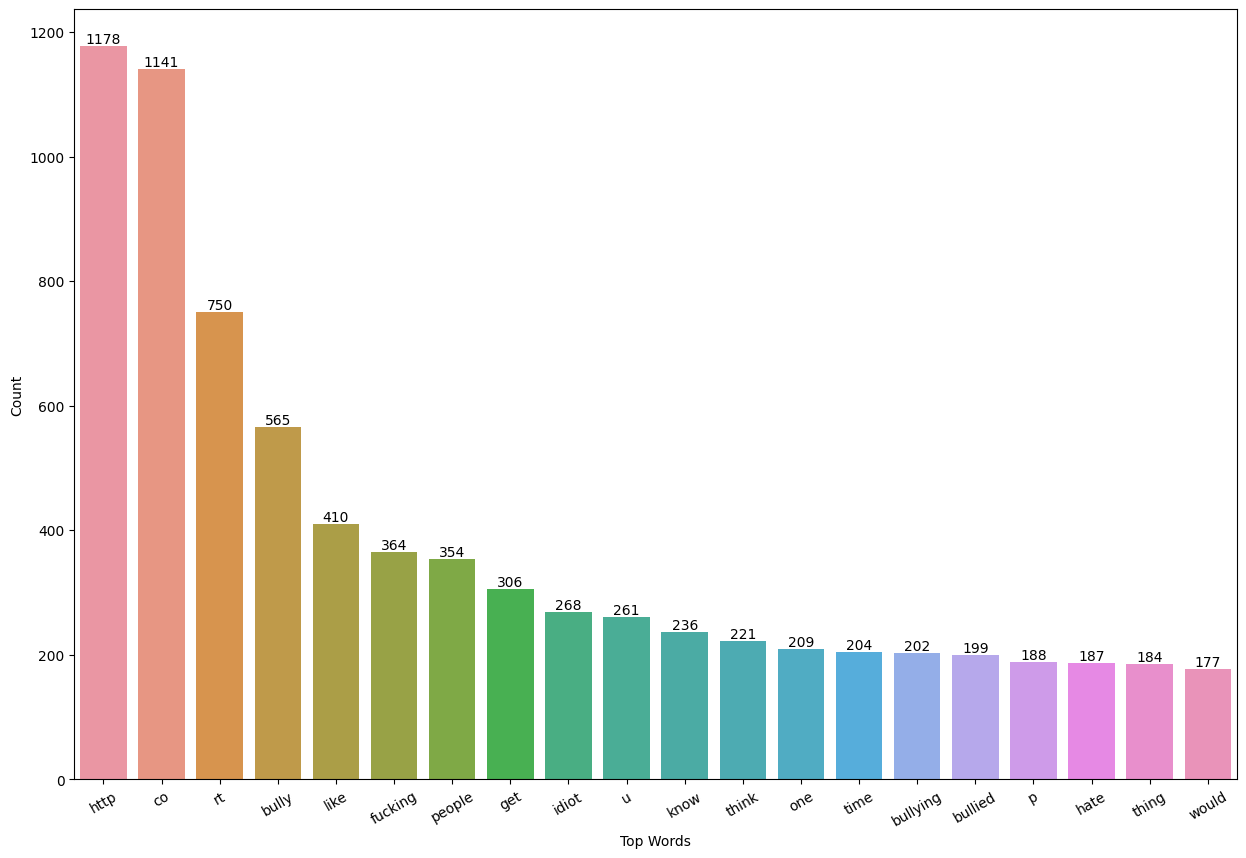

In [ ]:
## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
plt.figure(figsize=(15,10))
all_plot = sns.barplot(x=top_20['Top Words'], y=top_20['Count'])
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

Not Cyberbullying Type

In [ ]:
not_c = Counter([item for sublist in not_cyberbullying_type['tweet_list'] for item in sublist])
top_20 = pd.DataFrame(not_c.most_common(20))
top_20.columns=['Top Words','Count']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'mkr'),
  Text(1, 0, 'http'),
  Text(2, 0, 'co'),
  Text(3, 0, 'rt'),
  Text(4, 0, 'bullying'),
  Text(5, 0, 'bully'),
  Text(6, 0, 'like'),
  Text(7, 0, 'school'),
  Text(8, 0, 'get'),
  Text(9, 0, 'kat'),
  Text(10, 0, 'u'),
  Text(11, 0, 'amp'),
  Text(12, 0, 'people'),
  Text(13, 0, 'one'),
  Text(14, 0, 'go'),
  Text(15, 0, 'time'),
  Text(16, 0, 'know'),
  Text(17, 0, 'would'),
  Text(18, 0, 'think'),
  Text(19, 0, 'andre')])

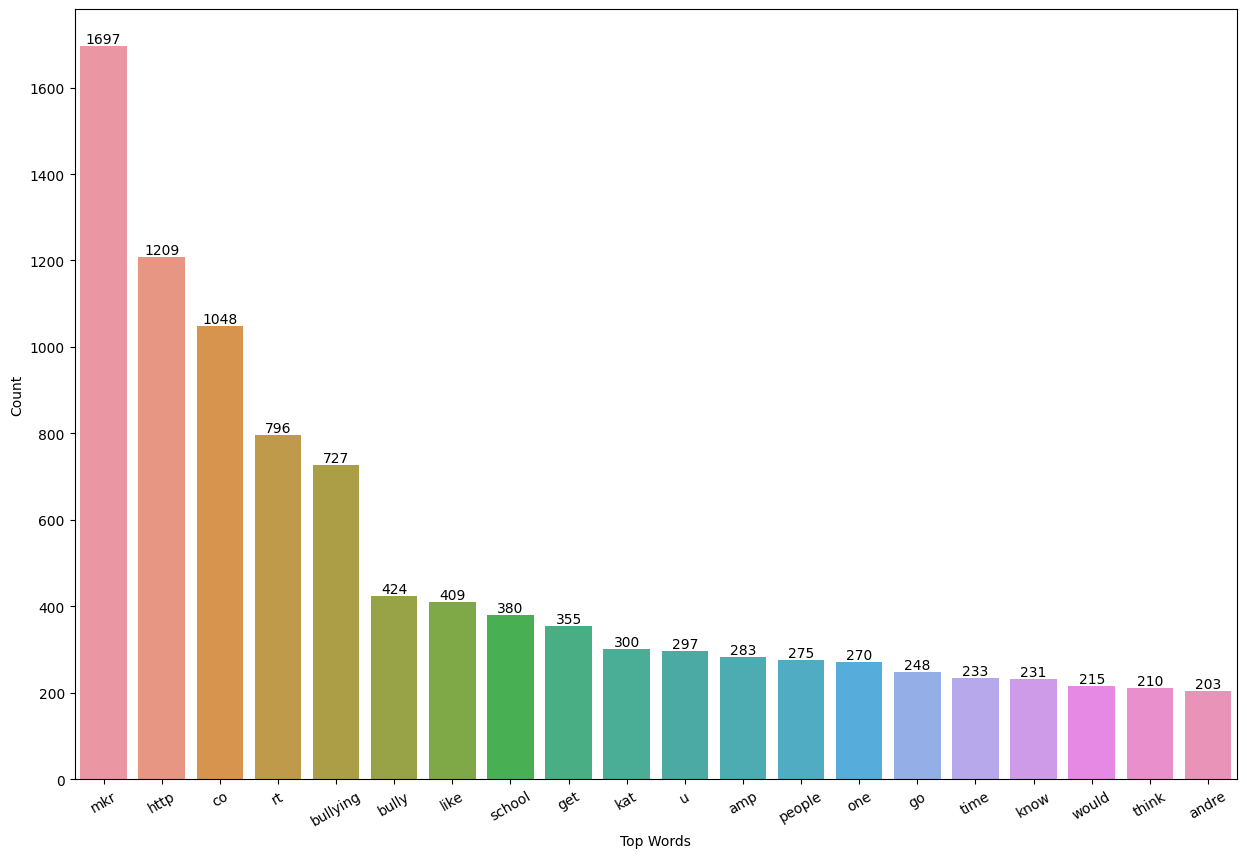

In [ ]:
## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
plt.figure(figsize=(15,10))
all_plot = sns.barplot(x=top_20['Top Words'], y=top_20['Count'])
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

Building Model

In [ ]:
X = df['tweet_text']
y = df['cyberbullying_type']

In [ ]:
tf = TfidfVectorizer(max_features=3000)
X_tf = tf.fit_transform(X).toarray()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_tf = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_tf,y_tf,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8563667970447632

In [ ]:
"""import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))
reviews=" ".join(gender_type['tweet_text'])

stopwords = set(stopwords.words('english'))

wordcloud = WordCloud(height=600,width = 600,max_words=500,max_font_size=100,stopwords=stopwords).generate(reviews)
plt.axis("off")
plt.show()"""

'import nltk\nfrom nltk.corpus import stopwords\nfrom wordcloud import WordCloud\nreviews = " ".join(df.corpus)\nplt.figure(figsize=(20,10))\nreviews=" ".join(gender_type[\'tweet_text\'])\n\nstopwords = set(stopwords.words(\'english\'))\n\nwordcloud = WordCloud(height=600,width = 600,max_words=500,max_font_size=100,stopwords=stopwords).generate(reviews)\nplt.axis("off")\nplt.show()'